# Modelo de aprendizaje NO supervisado

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook implementa un modelo de segmentación usando la data de resultados académicos de un grupo de estudiantes.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

-

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# K-means

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas del conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas).

Resultados de ejecutar el algoritmo:

+ Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.

+ Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir, que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez encontrados los centroids se deben analizar para ver cuáles son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Dónde usar K-means

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que se tenga asumida de los datos.

También puede ayudar a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no se hubieran reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

### Algunos usos:

+ Segmentación por comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
+ Categorización de productos: agrupar productos por actividad en sus ventas
+ Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

## Características de las entradas

Las “features” o características que se utilicen como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real”.

Es recomendable que los valores utilizados estén **normalizados**, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos.

No conviene utilizar features que estén correlacionados o que sean escalares de otros.

## Funcionamiento de K-means

El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo se debe pasar como entrada el conjunto de datos y un valor de K.

El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

### PASO 1- Asignación de datos

Cada “fila” del conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana. Se utiliza la siguiente fórmula (donde dist() es la distancia Euclideana standard):

argmin $dist(c_{i},x)^{2}$ con $c_{i} \in C$

### PASO 2 - Actualización de centroide

Los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

$c_{i} = \frac{1}{|S_{i}|}\sum_{x_i \in S_i} x_{i}$

El algoritmo itera entre estos pasos hasta cumplir uno de los criterios de detención:

+ Si no hay cambios en los puntos asignados a los grupos,
+ Si la suma de las distancias se minimiza,
+ Se alcanza un número máximo de iteraciones.

## Aplicación de K-Means

Usando dataset de desempeño de estudiantes

In [11]:
!pip install kneed

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import plotly.express as px

#%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [13]:
!wget https://www.dropbox.com/s/k82c8fw6hmjxuh0/dataset_StudentsPerformance.csv

--2025-06-12 23:22:21--  https://www.dropbox.com/s/k82c8fw6hmjxuh0/dataset_StudentsPerformance.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/2k376qmmcgl2by57e0oi4/dataset_StudentsPerformance.csv?rlkey=k3lcm5s1sdhcjgthrvcanuo70 [following]
--2025-06-12 23:22:21--  https://www.dropbox.com/scl/fi/2k376qmmcgl2by57e0oi4/dataset_StudentsPerformance.csv?rlkey=k3lcm5s1sdhcjgthrvcanuo70
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbefd986011e4fd61a1e660a0f1.dl.dropboxusercontent.com/cd/0/inline/Crg6DfQiwHTpf330YbyK2jQgAPGXeRPUvdzrISrurpO2-y-LiSeR8v5Pk7ymUrUsjqtNkfk1EwgdHlY9M9ObuWYpN10f4HCNLjY27uJodxzCeafGahHnzfXFrBtm2C_JTD-ujXmd-UxIqMuK44Ja09SC/file# [following]
--2025-06-12 23:22:22--  https://ucbefd98601

In [14]:
data_frame = pd.read_csv("dataset_StudentsPerformance.csv")
data_frame.head()

,user,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75


## Análisis exploratorio

In [15]:
data_frame.shape

(1000, 9)

In [16]:
data_frame.dtypes

,0
user,int64
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [17]:
# Estandariza nombres de columnas
data_frame.columns = data_frame.columns.str.lower().str.replace(" ", "_", regex=True)
data_frame.columns

Index(['user', 'gender', 'race/ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [18]:
# Vemos cuantos estudiantes hay de cada categoria (nivel de eduación de los padres)
data_frame.groupby('parental_level_of_education').size()

,0
parental_level_of_education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


In [19]:
def view_graph_interactive(data_frame, x :str, y :str, hover : str, title : str):
    """ Muestra un gráfico interactivo considerando 3 columnas

    x str : nombre de la columna asociada al eje X
    y str : nombre de la columna asociada al eje Y
    hover str :nombre de la columna que se mostrará al pasar el mouse por la gráfica

    returns None
    """
    fig = px.scatter(data_frame, x = x, y = y, color = hover,
                 hover_name = data_frame[hover].values,  width = 600, height = 600,
                 labels = {'x' : x, 'y' : y, hover : hover}, title = title)
    fig.show()

In [20]:
features = ['math_score', 'reading_score', 'writing_score']
view_graph_interactive(data_frame[features], x="writing_score",
                       y="reading_score", hover="math_score",title="Relación entre puntajes")

En la gráfica anterior se aprecia una relación entre altos puntajes en las pruebas de lectura, escritura y la de matemáticas.

## Análisis de la distribución de los puntajes

Como una forma de identificar posibles sesgos en los puntajes se revisa la distribución de los puntajes en las 3 pruebas.

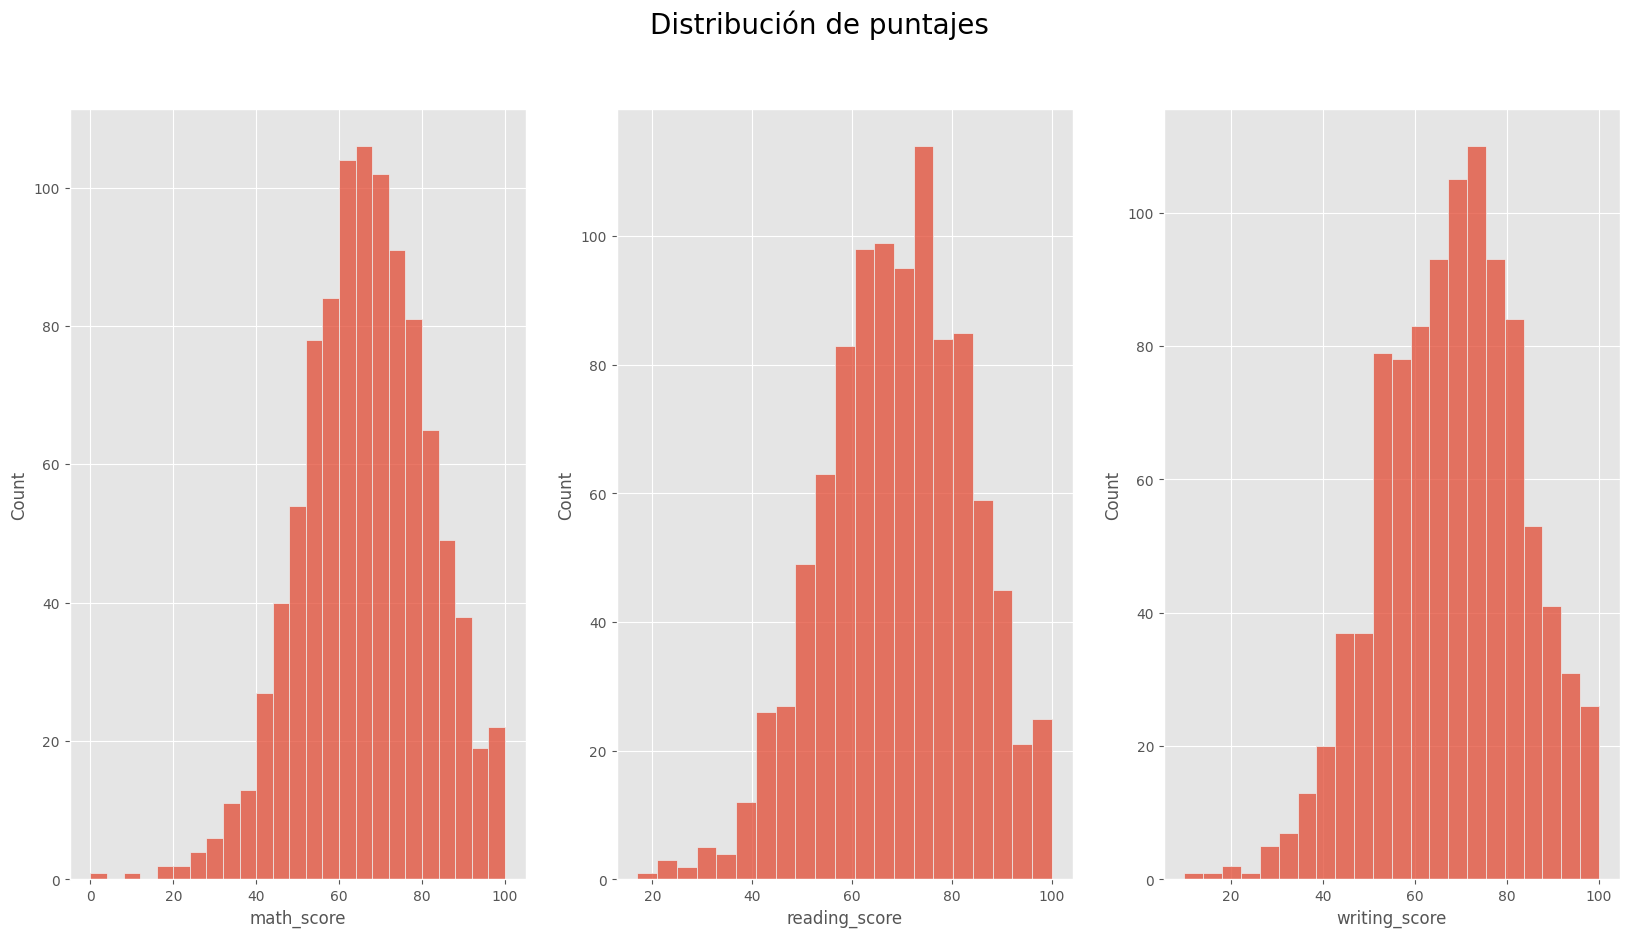

In [21]:
fig, ax = plt.subplots(1,3)
plt.suptitle("Distribución de puntajes", fontsize=20, horizontalalignment="center")
i = 0
for column in ['math_score', 'reading_score', 'writing_score']:
  sb.histplot(data_frame[column], ax = ax[i], kde=False)
  i+=1
plt.show()

## Aplicación del algoritmo

In [22]:
X = np.array(data_frame[["math_score", "reading_score", "writing_score"]])

Se calcula el SSE (suma de los cuadrados de la distancia euclidea de cada cluster)

In [23]:
sse = [] # acá vamos a guardar el puntaje de la función objetivo
print("Probando con varios clusters ...")
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
  sse.append(kkmeans.inertia_)

Probando con varios clusters ...


In [24]:
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

El codo está en k = 5
El SSE = [np.float64(111307.99410631611)]


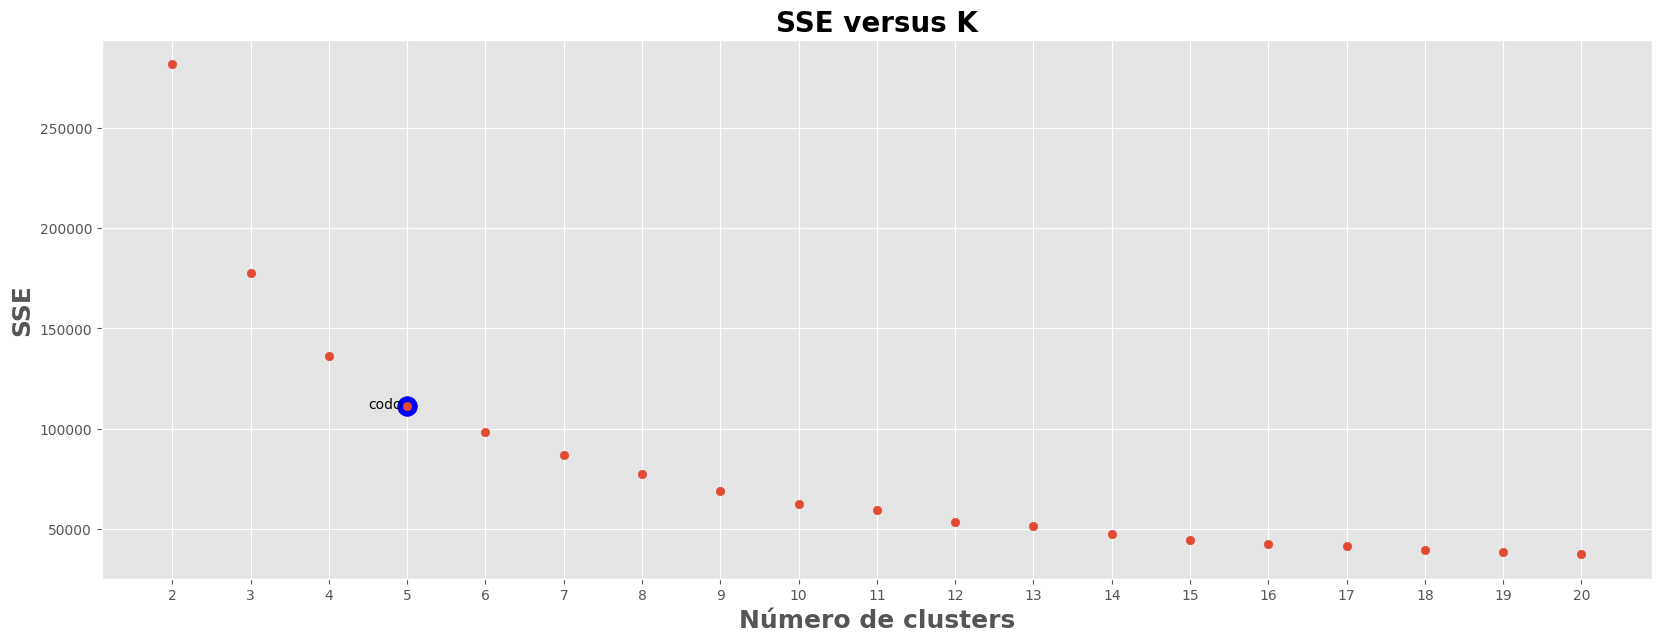

In [25]:
fig, ax = plt.subplots(figsize = (20, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5, sse[kl.elbow-2]-1000, s="codo")       # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

## Ejecución del algoritmo

Se ejecuta el algoritmo para la cantidad de clusters indicada por KneeLocator y se obtienen las etiquetas y los centroids.

In [26]:
kmeans = KMeans(n_clusters=kl.elbow, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[73.46953405 77.1218638  76.08602151]
 [63.11960133 65.81063123 65.18936877]
 [32.475      36.825      34.325     ]
 [51.19811321 53.4009434  51.27830189]
 [85.94642857 89.57738095 89.04761905]]


### Representación gráfica

Gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

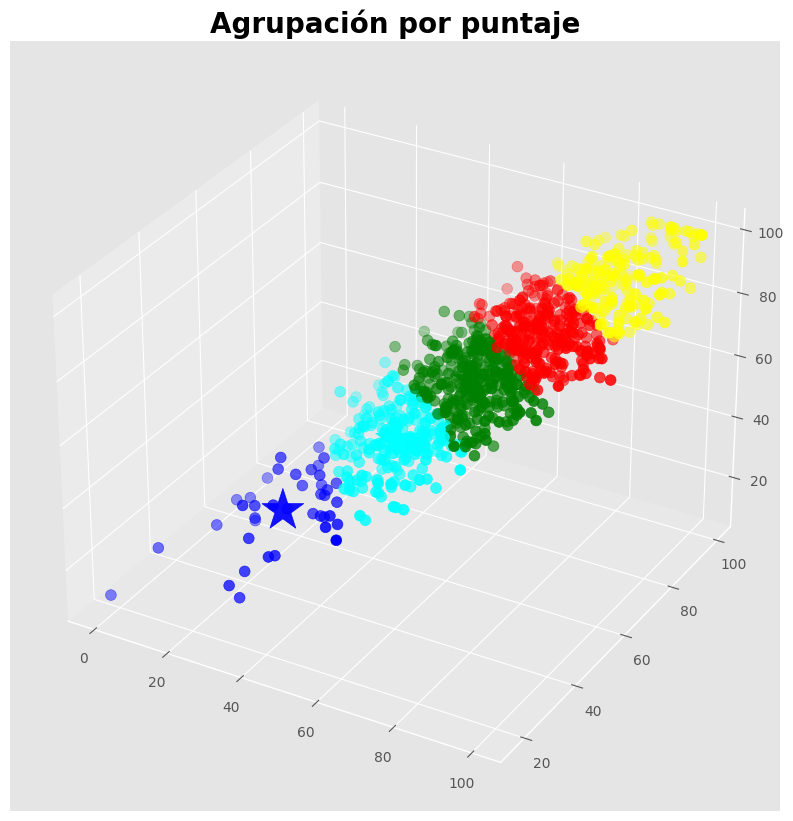

In [28]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
# 6 colores porque k = 6
colores=['red','green','blue','cyan','yellow', 'purple', 'orange']
colores = colores[:kl.elbow]
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(10,10))
# Creamos el plano 3D
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title("Agrupación por puntaje", fontsize=20, fontweight="bold")
plt.show()

### Análisis del gráfico

Es posible ver que el Algoritmo de K-Means con K indicado ha agrupado a los 1000 estudiantes teniendo en cuenta las 3 dimensiones que se utilizaron: puntaje en las pruebas de matemáticas, lectura y escritura.

### Gráficos de complemento

Se elaboran 3 gráficas en 2 dimensiones con las proyecciones a partir de la gráfica 3D para que ayude a visualizar los grupos y su clasificación:

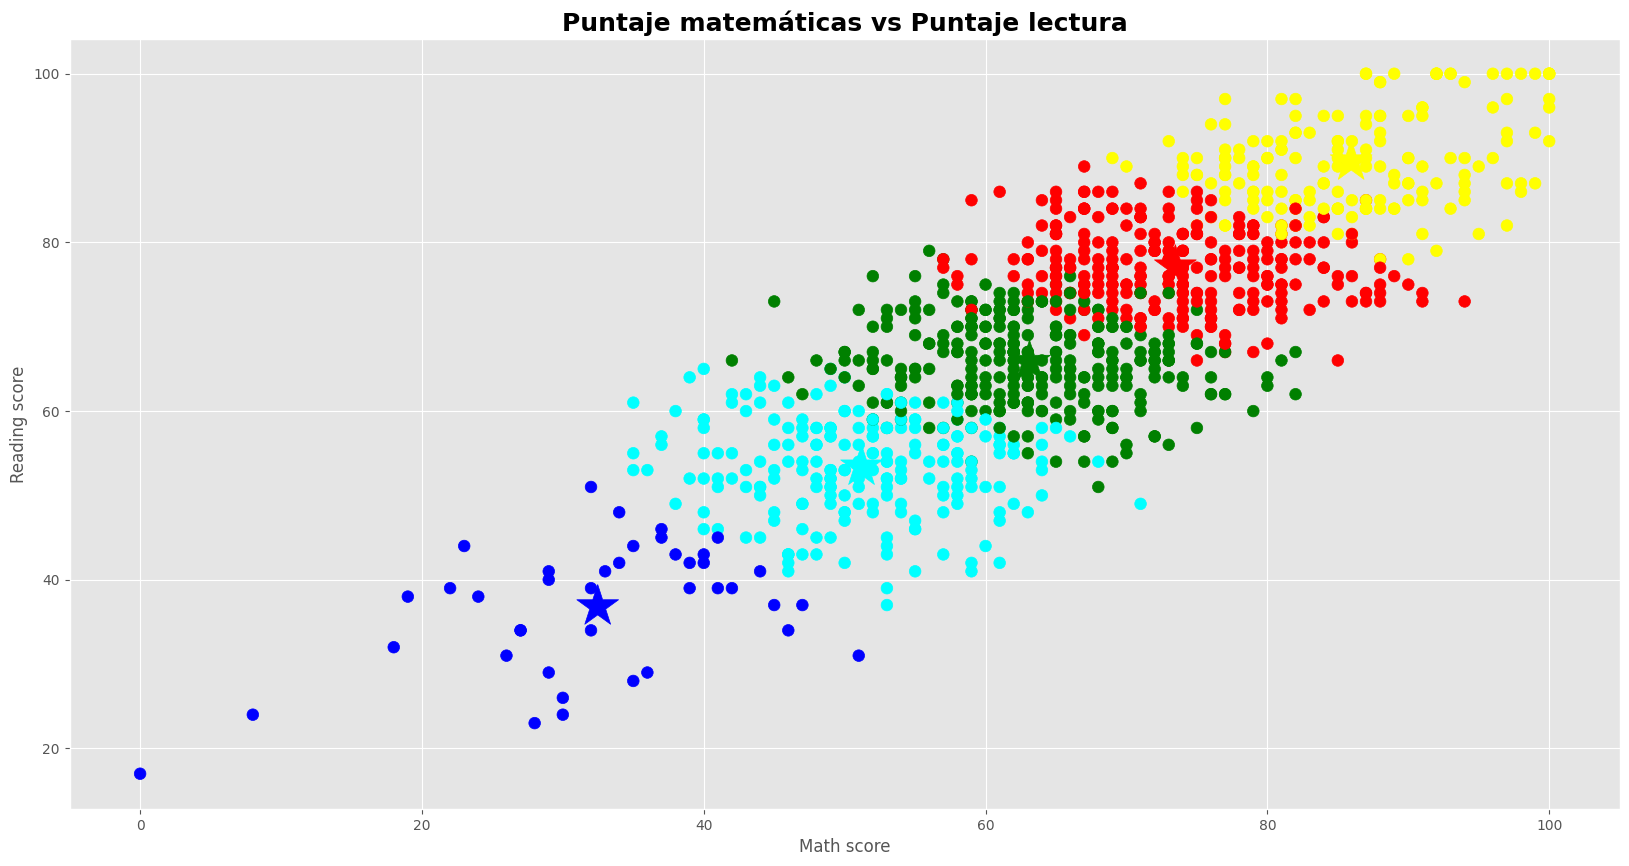

In [29]:
# Getting the values and plotting it
f1 = data_frame['math_score'].values
f2 = data_frame['reading_score'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.title("Puntaje matemáticas vs Puntaje lectura", fontsize=18, fontweight="bold")
plt.show()

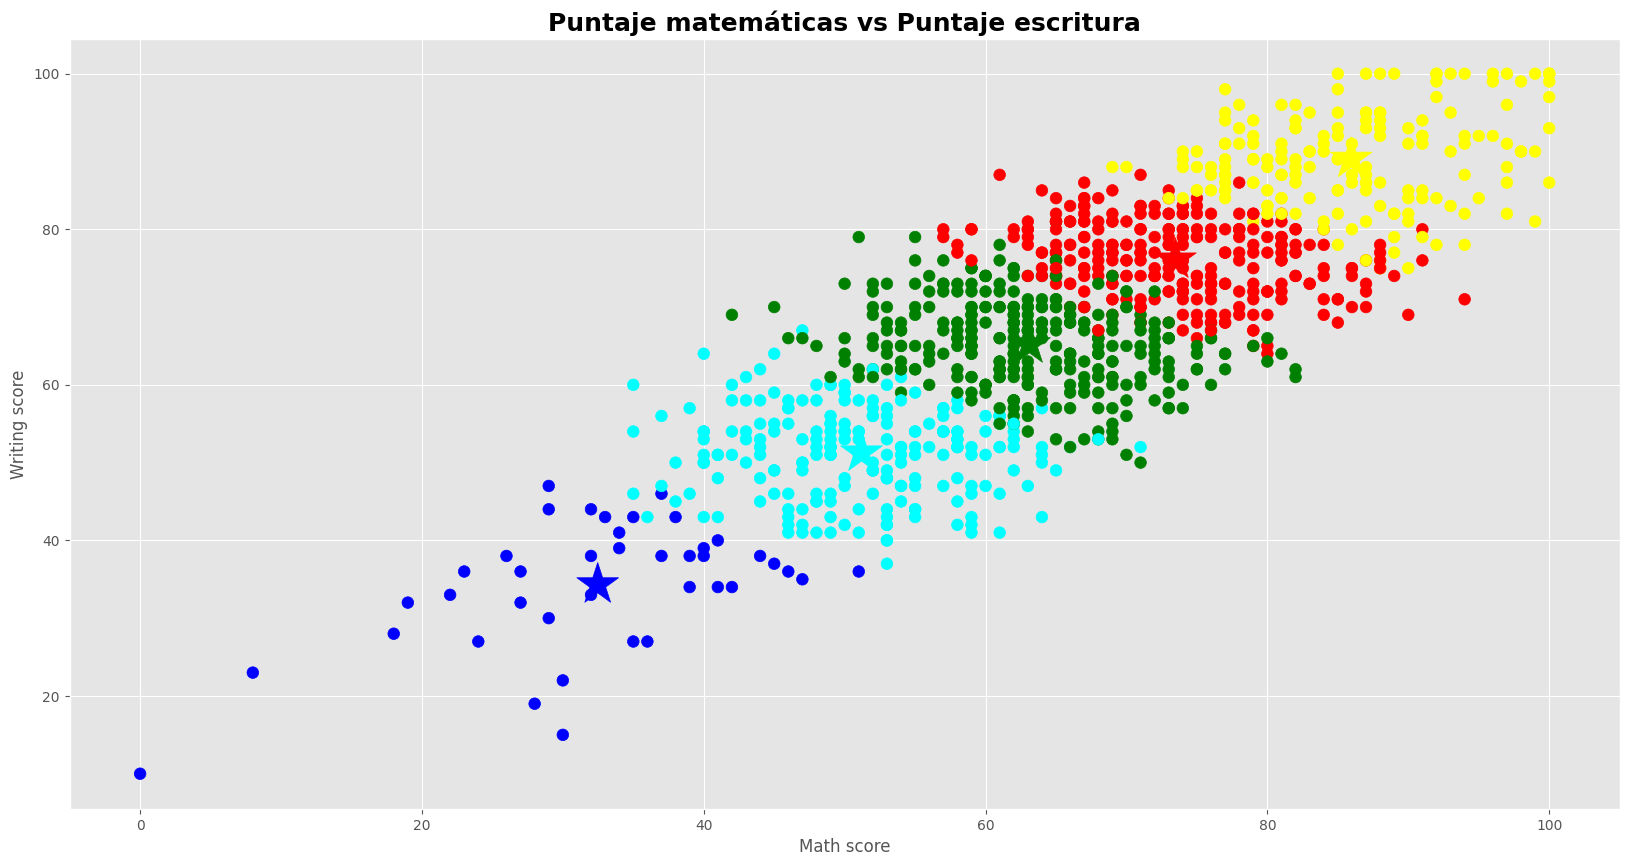

In [30]:
# Getting the values and plotting it
f1 = data_frame['math_score'].values
f2 = data_frame['writing_score'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.xlabel("Math score")
plt.ylabel("Writing score")
plt.title("Puntaje matemáticas vs Puntaje escritura", fontsize=18, fontweight="bold")
plt.show()

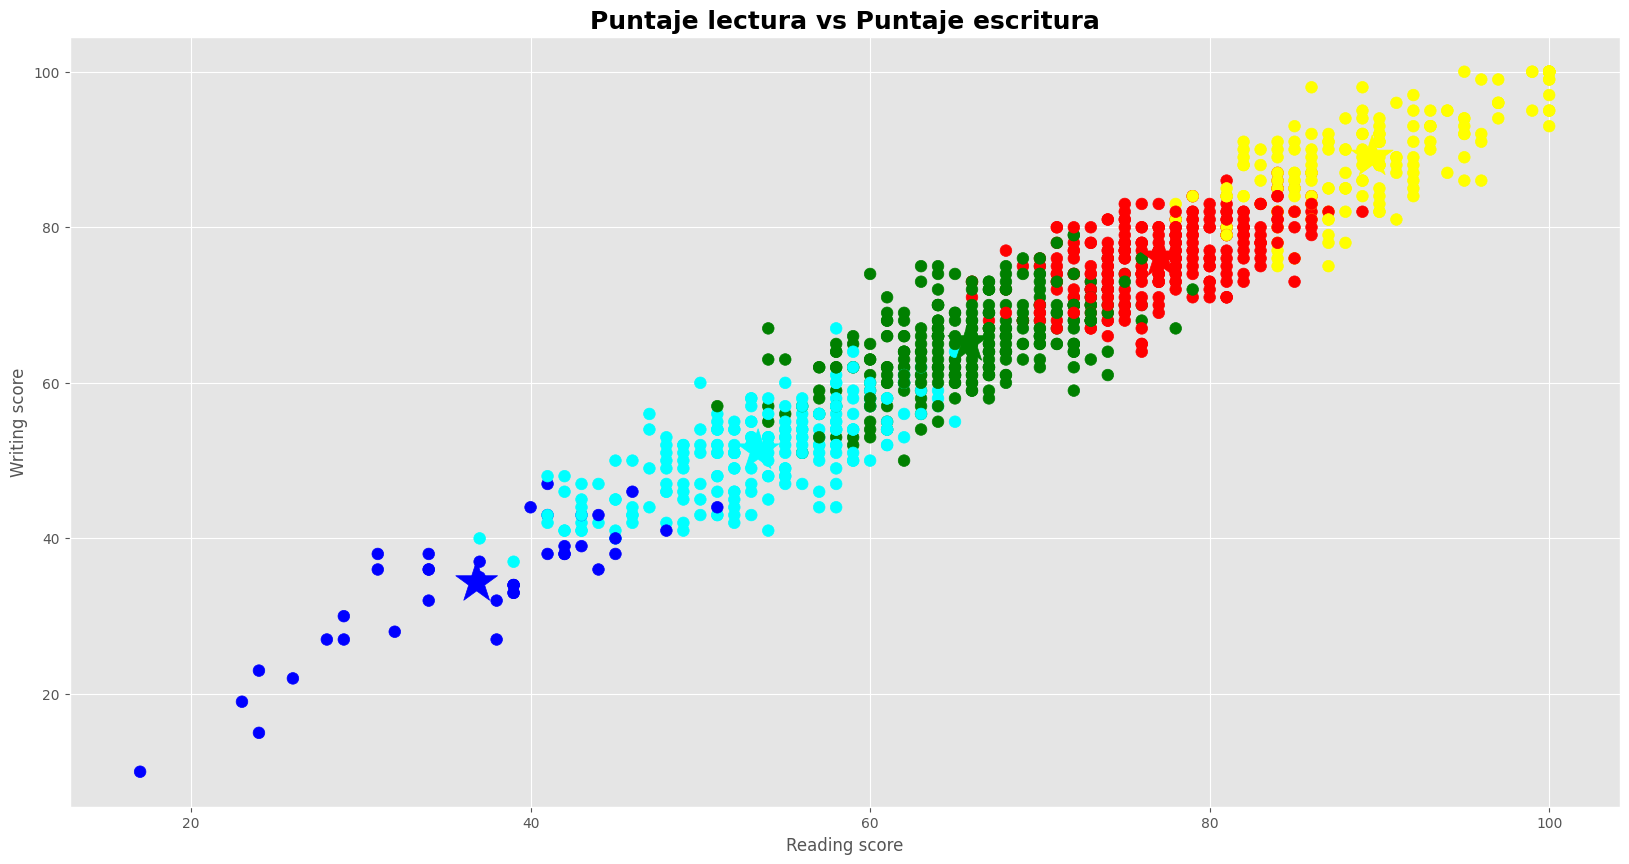

In [31]:
f1 = data_frame['reading_score'].values
f2 = data_frame['writing_score'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.xlabel("Reading score")
plt.ylabel("Writing score")
plt.title("Puntaje lectura vs Puntaje escritura", fontsize=18, fontweight="bold")
plt.show()

## Clasificación de nueva muestra

In [32]:
X_new = np.array([[87,90,88]])

new_labels = kmeans.predict(X_new)
print(new_labels)

[4]


## Conclusiones

El algoritmo de K-means ayudará a crear clusters cuando se tienen grandes grupos de datos sin etiquetar, cuando se quiera intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que se tienen del negocio.

Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre brindará “k clusters”, quedará a criterio reconocer la utilidad de los mismos o bien revisar las features y descartar las que no sirven o conseguir nuevas.

Se debe tener en cuenta que en este ejemplo se utilizó como medida de similitud entre features la distancia Euclidiana. Sin embargo, se puede utilizar otras funciones que podrían arrojar mejores resultados (como Manhattan, Lavenshtein, Mahalanobis, entre otros).

# Reducción de la dimensionalidad

In [35]:
features = ['math_score', 'reading_score', 'writing_score']
X = np.array(data_frame[features])
X_scaled = StandardScaler().fit_transform(X)

In [36]:
pca = PCA()
pca.fit(X_scaled)

PCA()

-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.90614325 0.07886171 0.01499504]


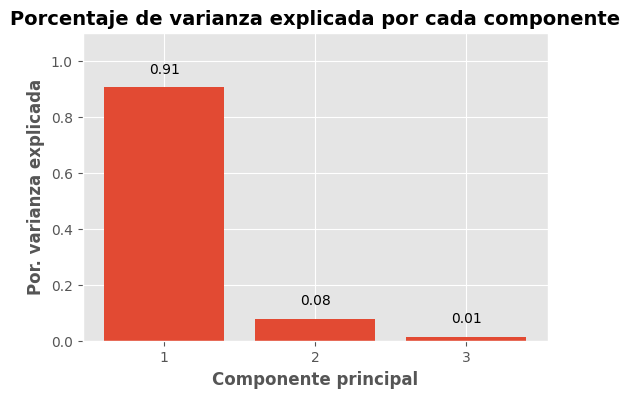

In [37]:
print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(features)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('Por. varianza explicada', fontsize=12, fontweight="bold");

El gráfico muestra que el primer componente principal (PC1) explica el 91% de la varianza de los datos asociados a las notas de matemática, lectura y escritura. Este es un hallazgo muy valioso porque indica que las tres variables están fuertemente correlacionadas y pueden reducirse a una sola dimensión sin perder casi nada de información.

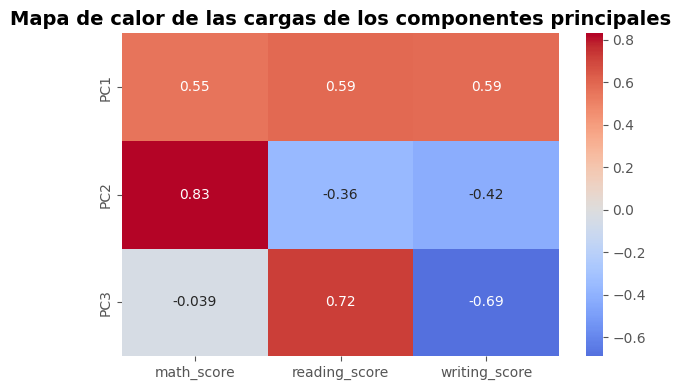

In [38]:
loadings = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(len(features))])
plt.figure(figsize=(6,4))
sb.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de las cargas de los componentes principales", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [39]:
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(n_components=1)

In [40]:
pca_components = pd.DataFrame(
    data    = pca.components_,
    columns = features,
    index   = ['PC1']
).T
pca_components

,PC1
math_score,0.554725
reading_score,0.589885
writing_score,0.586785


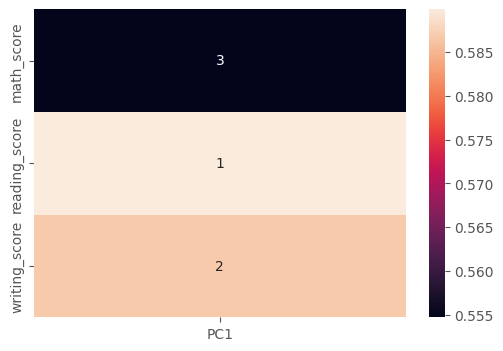

In [41]:
plt.figure(figsize=(6,4))
sb.heatmap(pca_components,  annot=pca_components.rank(axis="rows", ascending = False));